# Calculating Weights and Backtesting #2
Weights are calculated each quarterly rebalancing date going back to 12/31/2016. Backtesting shifts the weights around coins each rebalancing date, since not all coins were launched in 2016. Extra weight was distributed to other coins not meeting the cap based on their market caps.

### NOTE: as of the upload of this (1/4/2022) the yahoo finance api is broken on several coins. Will reupload once it is fixed
Bugs: not reading ICP and not having historical BTC & ETH data before 2017-11-09. Once these are fixed, code will run successfully.

In [1]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

end = dt.date(2021, 12, 30)
start = dt.date(2016, 12, 31)

## Filling the different tiers with constiuents:
'BTC-USD' included in tier 1 and 2 to force data to go back to 2016; computing daily returns through (close - open) / open

In [4]:
tier_1 = ['DOT-USD',
          'ATOM-USD',
          'ONE1-USD',
          'KSM-USD',
          'CKB-USD',
          'RUNE-USD',
          'MATIC-USD', 
          'BTC-USD']

tier_2 = ['LUNA1-USD',
          'SOL1-USD',
          'ADA-USD',
          'AVAX-USD',
          'TRX-USD',
          'FTM-USD',
          'EGLD-USD',
          'ICP1-USD',
          'VET-USD',
          'ALGO-USD',
          'ROSE-USD',
          'EOS-USD',
          'QTUM-USD',
          'XTZ-USD',
          'HBAR-USD',
          'ONT-USD',
          'ZEN-USD',
          'STX1-USD',
          'CELO-USD',
          'BTC-USD']

tier_3 = ['BTC-USD',
          'ETH-USD']

df1 = (reader.get_data_yahoo(tier_1, start, end)['Close'] - reader.get_data_yahoo(tier_1, start, end)['Open']) / reader.get_data_yahoo(tier_1, start, end)['Open']

df2 = (reader.get_data_yahoo(tier_2, start, end)['Close'] - reader.get_data_yahoo(tier_2, start, end)['Open']) / reader.get_data_yahoo(tier_2, start, end)['Open']

df3 = (reader.get_data_yahoo(tier_3, start, end)['Close'] - reader.get_data_yahoo(tier_3, start, end)['Open']) / reader.get_data_yahoo(tier_3, start, end)['Open']

C:\Users\cbure\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'ICP1-USD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\cbure\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'ICP1-USD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\cbure\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'ICP1-USD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [5]:
### NaN values for most coins in 2016 and 2017 bc they haven't launched yet 
print(df1,
df2,
df3)

Symbols      DOT-USD  ATOM-USD  ONE1-USD   KSM-USD   CKB-USD  RUNE-USD  \
Date                                                                     
2016-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2021-12-27 -0.013131 -0.078321 -0.013548 -0.003285  0.008717  0.062139   
2021-12-28 -0.098679 -0.103102 -0.097065 -0.085265 -0.082975 -0.129861   
2021-12-29 -0.040218  0.049530 -0.050962 -0.039254 -0.022475 -0.057664   
2021-12-30  0.027597  0.081685  0.018301 -0.011347  0.047298  0.009198   
2021-12-31 -0.030817  0.074740  0.021702 -0.010599 -0.017962 -0.008697   

Symbols     MATIC-USD   BTC-USD  
Dat

##### Delete the BTC columns, they're not in the tier

In [6]:
df1 = df1.drop('BTC-USD', 1)
df2 = df2.drop('BTC-USD', 1)

##### Replace NaN values with 0 for backtesting & make an index column id_num for use in tracking the ~90 days between rebalancing periods

In [7]:
df1 = df1.fillna(0)
df1.insert(0, 'id_num', range(1, 1 + len(df1)))

df2 = df2.fillna(0)
df2.insert(0, 'id_num', range(1, 1 + len(df2)))

df3 = df3.fillna(0)
df3.insert(0, 'id_num', range(1, 1 + len(df3)))

In [8]:
print(df1, df2, df3)

Symbols     id_num   DOT-USD  ATOM-USD  ONE1-USD   KSM-USD   CKB-USD  \
Date                                                                   
2016-12-31       1  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-01-01       2  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-01-02       3  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-01-03       4  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-01-04       5  0.000000  0.000000  0.000000  0.000000  0.000000   
...            ...       ...       ...       ...       ...       ...   
2021-12-27    1823 -0.013131 -0.078321 -0.013548 -0.003285  0.008717   
2021-12-28    1824 -0.098679 -0.103102 -0.097065 -0.085265 -0.082975   
2021-12-29    1825 -0.040218  0.049530 -0.050962 -0.039254 -0.022475   
2021-12-30    1826  0.027597  0.081685  0.018301 -0.011347  0.047298   
2021-12-31    1827 -0.030817  0.074740  0.021702 -0.010599 -0.017962   

Symbols     RUNE-USD  MATIC-USD  
Date                         

## List of historical market caps

We cannot pull historical market caps with yahoo finance, so had to hardcode them in. These are quarterly marketcaps, the last marketcap in each list is as of September 30, 2021, and going back 1 quarter each value in the list.

In [9]:
### market caps since 12/31/2016
# Tier 1
DOT_mc = [4322446635.64, 9469114707.93, 38701872968.66, 17484698847.44, 31343778065.89]
ATOM_mc = [1157460305, 420637568.4, 791053590.2, 374007880.1, 503721666, 1081493291, 1129544215, 4236624464, 2531440443, 7525543540]
ONE1_mc = [48424909.6, 13108962.22, 15865567.76, 10418242.68, 28174763.54, 31919698.92, 34339672.42, 1766994877, 674283746, 1523909827]
KSM_mc = [302772125.1, 525171674, 4558776176, 1811602269, 2733811230]
CKB_mc = [60120837.71, 85117208.52, 110449286.4, 82022246.46, 854193933.8, 348072702.9, 420000000]
RUNE_mc = [83936517.2, 192317382.7, 1736151812, 1548018147, 1465951067]
MATIC_mc = [52519955.69, 24062942.1, 36364642.82, 29497257.95, 68607178.26, 75323946.15, 87178222.71, 1860385647, 7378672916, 7337434975]

# Tier 2
LUNA_mc = [78368583.63, 129078857.7, 324265989.6, 7291007882, 2513520912, 13651237075]
SOL1_mc = [14716473.17, 117961741.6, 71467743.83, 5125485315, 9263435329, 40279262197]
ADA_mc = [16330574015, 3696261103, 3254005763, 2187197363, 1131968150, 1876570761, 2335794991, 966561189.7, 864239640.5, 770139956, 2177859450, 3148583451, 5723050250, 38757763905, 43856356089, 66159228423]
AVAX_mc = [101639269.4, 224892312, 3791442943, 2058383656, 14427018356]
TRX_mc = [2318273766, 2711717264, 2419769965, 1446458737, 1340954485, 1556465646, 2335936002, 889017219.6, 884150464, 762494042.8, 1079678365, 1885042029, 1932448777, 4735412126, 4867664987, 6155416686]
FTM_mc = [47928839.67, 19615159.89, 20591623.56, 5380495.996, 10833307.98, 83107629.76, 42557918.01, 1099961973, 598916234.7, 3053026796]
EGLD_mc = [8811615.724, 11493903.58, 8048494.266, 53449067.75, 270060.8454, 401000000, 2455946993, 1504148673, 3967475009]
ICP1_mc = [7330000000, 7400000000]
VET_mc = [715944597.9, 235855051.4, 327975687, 504595845.3, 185297875.8, 299826256.9, 162857676.7, 482456046.8, 848968584.7, 1301405026, 5743381263, 5788401929, 5445683365]
ALGO_mc = [88854618.95, 111239557.9, 103085760.4, 165218687, 358940708.4, 399420538.4, 3458467738, 2749136006, 9599989458]
ROSE_mc = [62751117.26, 276081345.9, 87993507.16, 378000000]
EOS_mc = [267965569.9, 4115946796, 4572818327, 6947607205, 5206196953, 2451582904, 3823357523, 5833670146, 2604489080, 2480890317, 2052316217, 2224214786, 2434818314, 2453095097, 4133910842, 3943807460, 3593183825]
QTUM_mc = [587506086.9, 3537608194, 1253795920, 723705523.6, 342889330.3, 207475405.8, 250168960, 534604172.5, 156769844.4, 156602708.8, 115822933.6, 161752603.8, 236743672.4, 216217144.2, 859539912.5, 744190286.8, 892835772.9]
XTZ_mc = [704103510.6, 295096651.1, 592926843.9, 688721209.5, 601306244.9, 926128510.5, 1172936883, 1787737370, 1690579368, 1528092650, 3555162427, 2533069497, 4852336672]
HBAR_mc = [16734275.67, 121312769.3, 180366323.4, 176160212.1, 214162140, 2994746284, 1679999427, 3196756021]
ONT_mc = [259653333.8, 781855797.4, 364825588.8, 182147019.2, 641951642, 772104756.5, 313439896.6, 334303461.3, 235747503.2, 417458644.6, 481499467.8, 358532994.7, 1327595492, 627681872.8, 639123096.2]
ZEN_mc = [17497188.04, 153516513.5, 59548035.08, 68225464.76, 81221159.56, 31974310.56, 41872324.68, 70660742.53, 24757830.41, 61429277.41, 49398527.1, 64229202.72, 56343348.92, 115137638.4, 571726983.5, 750693623, 752309991.7]
STX_mc = [32162854.94, 64327982.94, 95870665.38, 282842856.6, 1348102201, 868970614.2, 1426387587]
CELO_mc = [283610951.6, 190868355.9, 798787728.6, 805281671.6, 1746430957]
          
# Tier 3
BTC_mc = [15576503794.39, 17575951028.33, 40273068762.93, 71938913742.75, 233524465189.33, 117335340577.46, 109177747554.53, 114243175578.83, 64362351163.81, 72144407426.99, 192893862979.80, 148803916514.77, 129970082372.68, 117698734312.41, 168424268927.21, 199336157853.55, 539438485763.34, 1097648506570.54, 657308520165.89, 824440444029.20]
ETH_mc = [702886700.07, 4620204868.39, 26797925940.24, 27538040746.19, 66233351520.91, 38310155741.05, 43178454755.98, 23399822941.32, 14549158606.44, 14952276287.75, 33669891006.73, 18120831697.49, 14179081384.06, 14444181741.15, 25177008021.31, 40222436952.10, 85077766600.71, 210525145649.37, 250293822920.25, 333190201118.67]

mc_list_t1 = [DOT_mc, ATOM_mc, ONE1_mc, KSM_mc, CKB_mc, RUNE_mc, MATIC_mc]
mc_list_t2 = [LUNA_mc, SOL1_mc, ADA_mc, AVAX_mc, TRX_mc, FTM_mc, EGLD_mc, ICP1_mc, VET_mc, ALGO_mc, ROSE_mc, EOS_mc, QTUM_mc, XTZ_mc, HBAR_mc, ONT_mc, ZEN_mc, STX_mc, CELO_mc]
mc_list_t3 = [BTC_mc, ETH_mc]

### Adding zeroes in to marketcap dataframes^^, so length is 20
12/31/16 - 9/30/21 = 20 rebalancing periods
temp_list_t# is a 2D array of the market caps for each each in tier #

In [10]:
def add_zeros(dataframe):
    while(len(dataframe) < 20):
        dataframe.insert(0, 0)
    return(dataframe)

### temp_list_t# is a list of lists of historical marketcaps for tier #
temp_list_t1 = []
temp_list_t2 = []
temp_list_t3 = []


for i in range(len(mc_list_t1)):
    temp_list_t1.append(add_zeros(mc_list_t1[i]))
        
for i in range(len(mc_list_t2)):
    temp_list_t2.append(add_zeros(mc_list_t2[i]))
        
for i in range(len(mc_list_t3)):
    temp_list_t3.append(add_zeros(mc_list_t3[i]))

In [11]:
print("DOT marketcaps every rebalance date starting 12/31/2016: ", temp_list_t1[0])

DOT marketcaps every rebalance date starting 12/31/2016:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4322446635.64, 9469114707.93, 38701872968.66, 17484698847.44, 31343778065.89]


## Creating list of weights based on market caps at a single point in time

##### The reweighting_function runs recursively to have the inputted list of weights either meet the cap standards or be equally weighted if it cannot meet the cap

In [12]:
def reweighting_function(weight_list, cap, index_list_of_nonzeroes_undercap):
    """
    reweighting_function outputs a list of weights that all fit the max cap
    :param weight_list: a list of weights, most likely not fitting the cap
    :param cap: max weight of any 1 constituent
    :param index_list_of_nonzeroes_undercap: ordered list of the indexes of non-zero weights
    :return: a list of weights that fit the cap
    """

    ### Obtaining the excess value, amount of weight thats over the cap, to be distributed to other constituents
    temp_excess_val = 0
    for i in range(len(weight_list)):
        if(weight_list[i] > cap):
            temp_excess_val += weight_list[i] - cap
            weight_list[i] = cap

    ### Obtaining the cumulative value of weights between 0 and the cap
    temp_mc = 0
    for i in index_list_of_nonzeroes_undercap:
        temp_mc += weight_list[i]

    ### Allocating the excess value over the cap to constituent weights between 0 and the cap
    for i in index_list_of_nonzeroes_undercap:
        mc_adj_extra_weight = (weight_list[i] / temp_mc) * temp_excess_val
        weight_list[i] = weight_list[i] + mc_adj_extra_weight
        
    ### Get the indexes of nonzero below-cap weights
    non0_undercap_list_index = []
    for i in range(len(weight_list)):
            if(cap > weight_list[i] > 0):
                non0_undercap_list_index.append(i)
    
    ### Recursive part keeps running function until weights all fit
    for i in range(len(weight_list)):
        if(weight_list[i] > cap):
            reweighting_function(weight_list, cap, non0_undercap_list_index)
            break

    return(weight_list)

##### The weighting_function runs reweighting_function, so this one function can determine the weights of a tier

In [13]:
def weighting_function(marketcaps, cap):  
    """
    weighting_function outputs a list of appropriate weights accounting for caps
    :param marketcaps: a list of marketcaps
    :param cap: max weight of any 1 constituent
    :return: a list of weights
    """
    total_marketcap = 0
    
    ### Add all market caps
    for i in range(len(marketcaps)):
        total_marketcap += marketcaps[i]
    
    ### If marketcaps list is all 0s, return all those 0s as weights
    if(total_marketcap == 0):
        return(marketcaps)
    
    ### First iteration of weighting
    weight_list = []
    for i in range(len(marketcaps)):
        temp_weight = marketcaps[i] / total_marketcap
        weight_list.append(temp_weight)

    ### Get the indexes of nonzero weights
    non0_list_index = []
    for i in range(len(weight_list)):
            if(weight_list[i] > 0):
                non0_list_index.append(i)
    
    ### Get the indexes of nonzero below-cap weights
    non0_undercap_list_index = []
    for i in range(len(weight_list)):
            if(cap > weight_list[i] > 0):
                non0_undercap_list_index.append(i)
    
    ### If number of nonzero marketcaps (or weights) is too small to fit under cap, assigns most equal weights
    if(1 / np.count_nonzero(weight_list) > cap):
        for i in range(len(weight_list)):
            if(i in non0_list_index):
                weight_list[i] = 1 / np.count_nonzero(weight_list)
            else:
                weight_list[i] = 0
        return(weight_list)
    ### Run recursive rewighting function
    weight_list = reweighting_function(weight_list, cap, non0_undercap_list_index)
    
    return(weight_list)

## Creating a list of lists of weights of constituents in each tier

##### Tier 1

In [14]:
dataframe_of_mcs_quarterly_t1 = []

for i in range(len(temp_list_t1[0])):
    dataframe_of_mcs_at_one_point = []
    for j in range(len(temp_list_t1)):
        ### temp_list_t1 is a list of lists of historical marketcaps for tier 1
        temp_value = temp_list_t1[j][i]
        dataframe_of_mcs_at_one_point.append(temp_value)
    dataframe_of_mcs_quarterly_t1.append(dataframe_of_mcs_at_one_point)

t1_list_of_list_of_weights = []
for i in range(len(dataframe_of_mcs_quarterly_t1)):
    t1_list_of_list_of_weights.append(weighting_function(dataframe_of_mcs_quarterly_t1[i], 0.2))

In [15]:
print("List of tier 1 weights within the tier as of last rebalancing period (9/30/2021): ", t1_list_of_list_of_weights[19])

List of tier 1 weights within the tier as of last rebalancing period (9/30/2021):  [0.2, 0.2, 0.09921817416309764, 0.1779920005379506, 0.027345209283502453, 0.09544461601544935, 0.2]


##### Tier 2

In [16]:
dataframe_of_mcs_quarterly_t2 = []

for i in range(len(temp_list_t2[0])):
    dataframe_of_mcs_at_one_point = []
    for j in range(len(temp_list_t2)):
        ### temp_list_t2 is a list of lists of historical marketcaps for tier 2
        temp_value = temp_list_t2[j][i]
        dataframe_of_mcs_at_one_point.append(temp_value)
    dataframe_of_mcs_quarterly_t2.append(dataframe_of_mcs_at_one_point)

t2_list_of_list_of_weights = []
for i in range(len(dataframe_of_mcs_quarterly_t2)):
    t2_list_of_list_of_weights.append(weighting_function(dataframe_of_mcs_quarterly_t2[i], 0.15))

In [17]:
print("List of tier 2 weights within the tier as of last rebalancing period (9/30/2021): ", t2_list_of_list_of_weights[19])

List of tier 2 weights within the tier as of last rebalancing period (9/30/2021):  [0.11771611606125877, 0.15, 0.15, 0.1244057632200199, 0.05307883388396761, 0.02632658525242622, 0.03421197259000703, 0.06381101244286427, 0.04695872553566405, 0.08278176307510862, 0.003259535500459824, 0.03098441861710454, 0.007699020893777869, 0.04184223185864305, 0.02756597813957193, 0.005511228627586505, 0.006487251654224299, 0.01229989676518975, 0.015059665882125721]


##### Tier 3

In [18]:
dataframe_of_mcs_quarterly_t3 = []

for i in range(len(temp_list_t3[0])):
    dataframe_of_mcs_at_one_point = []
    for j in range(len(temp_list_t3)):
        ### temp_list_t3 is a list of lists of historical marketcaps for tier 3    
        temp_value = temp_list_t3[j][i]
        dataframe_of_mcs_at_one_point.append(temp_value)
    dataframe_of_mcs_quarterly_t3.append(dataframe_of_mcs_at_one_point)

t3_list_of_list_of_weights = []
for i in range(len(dataframe_of_mcs_quarterly_t3)):
    t3_list_of_list_of_weights.append(weighting_function(dataframe_of_mcs_quarterly_t3[i], 1.0))
    

In [19]:
print("List of tier 3 weights within the tier as of last rebalancing period (9/30/2021): ", t3_list_of_list_of_weights[19])

List of tier 3 weights within the tier as of last rebalancing period (9/30/2021):  [0.7121791803670592, 0.2878208196329408]


### Weights of each coin within its tier

Each tier has its own weight within the index: Tier 1 50%, Tier 2 40%, Tier 3 10%

In [20]:
print("Tier1 Weights (within tier): ")
### must do the - 1 bc we originally added BTC-USD to tier_1 to initialize data back to 12/31/2016
for j in range(len(tier_1) - 1):
    print(tier_1[j] + ": " + str(t1_list_of_list_of_weights[19][j] * 100) + ' %')

    
print('\n' + "Tier2 Weights (within tier): ")
for j in range(len(tier_2) - 1):
    print(tier_2[j] + ": " + str(t2_list_of_list_of_weights[19][j] * 100) + ' %')

    
print('\n' + "Tier3 Weights (within tier): ")
for j in range(len(tier_3)):
    print(tier_3[j] + ": " + str(t3_list_of_list_of_weights[19][j] * 100) + ' %')

Tier1 Weights (within tier): 
DOT-USD: 20.0 %
ATOM-USD: 20.0 %
ONE1-USD: 9.921817416309764 %
KSM-USD: 17.79920005379506 %
CKB-USD: 2.7345209283502454 %
RUNE-USD: 9.544461601544935 %
MATIC-USD: 20.0 %

Tier2 Weights (within tier): 
LUNA1-USD: 11.771611606125877 %
SOL1-USD: 15.0 %
ADA-USD: 15.0 %
AVAX-USD: 12.44057632200199 %
TRX-USD: 5.307883388396761 %
FTM-USD: 2.632658525242622 %
EGLD-USD: 3.421197259000703 %
ICP1-USD: 6.381101244286428 %
VET-USD: 4.695872553566405 %
ALGO-USD: 8.278176307510861 %
ROSE-USD: 0.32595355004598237 %
EOS-USD: 3.098441861710454 %
QTUM-USD: 0.7699020893777869 %
XTZ-USD: 4.1842231858643055 %
HBAR-USD: 2.756597813957193 %
ONT-USD: 0.5511228627586505 %
ZEN-USD: 0.64872516542243 %
STX1-USD: 1.2299896765189748 %
CELO-USD: 1.5059665882125721 %

Tier3 Weights (within tier): 
BTC-USD: 71.21791803670592 %
ETH-USD: 28.782081963294083 %


## Functions to backtest each Tier
These functions backtest using an adjusting market cap weighting on historical data; weights change quarterly according to the rulebook.

In [21]:
### Market-Cap Weighted- Tier 1

def backtesting_data_df1(row, weight_list, i):  
    """
    backtesting_data calculates value of a portfolio

    :param row: dataframe to use
    :param weight_list: list of list of weights quarterly
    :param i: what round/row we are on
    :return: value of portfolio
    """
    m = 100
    
    ### id_num is the index column that numbers each row 1, 2, 3, ..... for purposes of rebalancing every quarter or ~90 days
    ### 'm' refers to the the index of the list of weights within weight_list, since it contains weights for every rebalancing period
    if(row['id_num'][i] < 91):
        m = 0
    elif(row['id_num'][i] < 182):
        m = 1
    elif(row['id_num'][i] < 274):
        m = 2
    elif(row['id_num'][i] < 366):
        m = 3
    elif(row['id_num'][i] < 456):
        m = 4
    elif(row['id_num'][i] < 547):
        m = 5
    elif(row['id_num'][i] < 639):
        m = 6
    elif(row['id_num'][i] < 731):
        m = 7
    elif(row['id_num'][i] < 821):
        m = 8
    elif(row['id_num'][i] < 912):
        m = 9
    elif(row['id_num'][i] < 1004):
        m = 10
    elif(row['id_num'][i] < 1096):
        m = 11
    elif(row['id_num'][i] < 1187):
        m = 12
    elif(row['id_num'][i] < 1277):
        m = 13
    elif(row['id_num'][i] < 1369):
        m = 14
    elif(row['id_num'][i] < 1458):
        m = 15
    elif(row['id_num'][i] < 1548):
        m = 16
    elif(row['id_num'][i] < 1639):
        m = 17
    elif(row['id_num'][i] < 1731):
        m = 18
    else:
        m = 19
    

    value = (row['DOT-USD'][i] * weight_list[m][0] + 
        row['ATOM-USD'][i] * weight_list[m][1] + 
        row['ONE1-USD'][i] * weight_list[m][2] + 
        row['KSM-USD'][i] * weight_list[m][3] + 
        row['CKB-USD'][i] * weight_list[m][4] + 
        row['RUNE-USD'][i] * weight_list[m][5] + 
        row ['MATIC-USD'][i] * weight_list[m][6])
        
    return(value)

In [22]:
### Market-Cap Weighted- Tier 2

def backtesting_data_df2(row, weight_list, i):  
    """
    backtesting_data calculates value of a portfolio

    :param row: dataframe to use
    :param weight_list: list of list of weights quarterly
    :param i: what round/row we are on
    :return: value of portfolio
    """
    m = 100
    
    ### id_num is the index column that numbers each row 1, 2, 3, ..... for purposes of rebalancing every quarter / ~90 days
    if(row['id_num'][i] < 91):
        m = 0
    elif(row['id_num'][i] < 182):
        m = 1
    elif(row['id_num'][i] < 274):
        m = 2
    elif(row['id_num'][i] < 366):
        m = 3
    elif(row['id_num'][i] < 456):
        m = 4
    elif(row['id_num'][i] < 547):
        m = 5
    elif(row['id_num'][i] < 639):
        m = 6
    elif(row['id_num'][i] < 731):
        m = 7
    elif(row['id_num'][i] < 821):
        m = 8
    elif(row['id_num'][i] < 912):
        m = 9
    elif(row['id_num'][i] < 1004):
        m = 10
    elif(row['id_num'][i] < 1096):
        m = 11
    elif(row['id_num'][i] < 1187):
        m = 12
    elif(row['id_num'][i] < 1277):
        m = 13
    elif(row['id_num'][i] < 1369):
        m = 14
    elif(row['id_num'][i] < 1458):
        m = 15
    elif(row['id_num'][i] < 1548):
        m = 16
    elif(row['id_num'][i] < 1639):
        m = 17
    elif(row['id_num'][i] < 1731):
        m = 18
    else:
        m = 19
    
        
    value = (row['LUNA1-USD'][i] * weight_list[m][0] + 
        row['SOL1-USD'][i] * weight_list[m][1] + 
        row['ADA-USD'][i] * weight_list[m][2] + 
        row['AVAX-USD'][i] * weight_list[m][3] + 
        row['TRX-USD'][i] * weight_list[m][4] + 
        row['FTM-USD'][i] * weight_list[m][5] + 
        row['EGLD-USD'][i] * weight_list[m][6] +
        row['ICP1-USD'][i] * weight_list[m][7] + 
        row['VET-USD'][i] * weight_list[m][8] + 
        row['ALGO-USD'][i] * weight_list[m][9] + 
        row['ROSE-USD'][i] * weight_list[m][10] + 
        row['EOS-USD'][i] * weight_list[m][11] +
        row['QTUM-USD'][i] * weight_list[m][12] + 
        row['XTZ-USD'][i] * weight_list[m][13] + 
        row['HBAR-USD'][i] * weight_list[m][14] + 
        row['ONT-USD'][i] * weight_list[m][15] + 
        row['ZEN-USD'][i] * weight_list[m][16] + 
        row['STX1-USD'][i] * weight_list[m][17] + 
        row['CELO-USD'][i] * weight_list[m][18])
        
    return(value)


In [23]:
### Market-Cap Weighted- Tier 3

def backtesting_data_df3(row, weight_list, i):  
    """
    backtesting_data calculates value of a portfolio

    :param row: dataframe to use
    :param weight_list: list of list of weights quarterly
    :param i: what round/row we are on
    :return: value of portfolio
    """
    m = 100
    
    ### id_num is the index column that numbers each row 1, 2, 3, ..... for purposes of rebalancing every quarter / ~90 days
    if(row['id_num'][i] < 91):
        m = 0
    elif(row['id_num'][i] < 182):
        m = 1
    elif(row['id_num'][i] < 274):
        m = 2
    elif(row['id_num'][i] < 366):
        m = 3
    elif(row['id_num'][i] < 456):
        m = 4
    elif(row['id_num'][i] < 547):
        m = 5
    elif(row['id_num'][i] < 639):
        m = 6
    elif(row['id_num'][i] < 731):
        m = 7
    elif(row['id_num'][i] < 821):
        m = 8
    elif(row['id_num'][i] < 912):
        m = 9
    elif(row['id_num'][i] < 1004):
        m = 10
    elif(row['id_num'][i] < 1096):
        m = 11
    elif(row['id_num'][i] < 1187):
        m = 12
    elif(row['id_num'][i] < 1277):
        m = 13
    elif(row['id_num'][i] < 1369):
        m = 14
    elif(row['id_num'][i] < 1458):
        m = 15
    elif(row['id_num'][i] < 1548):
        m = 16
    elif(row['id_num'][i] < 1639):
        m = 17
    elif(row['id_num'][i] < 1731):
        m = 18
    else:
        m = 19
    

    value = (row['BTC-USD'][i] * weight_list[m][0] + 
        row['ETH-USD'][i] * weight_list[m][1])
        
    return(value)

## Creating empty dataframe and putting three tier's values into it

In [24]:
df_final = pd.DataFrame()

temp_df = pd.DataFrame(columns=['Tier1 Daily Moves', 'Tier2 Daily Moves', 'Tier3 Daily Moves'])
df_final = df_final.join(temp_df, how="outer")

### have to add BTC-USD to initialize list to have values going back 5 years
df_final['BTC-USD'] = df3['BTC-USD']

for i in range(len(df1['DOT-USD'])):
    df_final['Tier1 Daily Moves'][i] = backtesting_data_df1(df1, t1_list_of_list_of_weights, i)
    
for i in range(len(df2['SOL1-USD'])):
    df_final['Tier2 Daily Moves'][i] = backtesting_data_df2(df2, t2_list_of_list_of_weights, i)
    
for i in range(len(df3['BTC-USD'])):
    df_final['Tier3 Daily Moves'][i] = backtesting_data_df3(df3, t3_list_of_list_of_weights, i)


<ipython-input-24-803a36c93097>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Tier1 Daily Moves'][i] = backtesting_data_df1(df1, t1_list_of_list_of_weights, i)
<ipython-input-24-803a36c93097>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Tier2 Daily Moves'][i] = backtesting_data_df2(df2, t2_list_of_list_of_weights, i)
<ipython-input-24-803a36c93097>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[

## Daily returns of each tier going back 5 years

In [25]:
df_final = df_final.drop('BTC-USD', 1)

In [26]:
print(df_final)

           Tier1 Daily Moves Tier2 Daily Moves Tier3 Daily Moves
Date                                                            
2016-12-31               0.0               0.0          0.003104
2017-01-01               0.0               0.0          0.034421
2017-01-02               0.0               0.0          0.022165
2017-01-03               0.0               0.0           0.02083
2017-01-04               0.0               0.0          0.101078
...                      ...               ...               ...
2021-12-27         -0.024515         -0.015252           -0.0042
2021-12-28         -0.096642         -0.048511         -0.060306
2021-12-29          -0.01822         -0.027174         -0.030435
2021-12-30          0.030374           0.00806          0.017001
2021-12-31          0.005392          0.002748         -0.015416

[1827 rows x 3 columns]


## Calculating daily returns of index based on weighted tiers
Tiers 1 and 2 don't have any existing constituents in first year or two, need to correctly weight index

In [27]:
### weight for each tier in the index
tier1_weight = 0.5
tier2_weight = 0.4
tier3_weight = 0.1

temporary_df = pd.DataFrame(columns=['Index Daily Returns'])
df_final = df_final.join(temporary_df, how="outer")

for i in range(len(df_final['Tier3 Daily Moves'])):
    if(df_final['Tier1 Daily Moves'][i] == 0 and (df_final['Tier2 Daily Moves'][i] == 0)):
        df_final['Index Daily Returns'][i] = df_final['Tier3 Daily Moves'][i]
    elif(df_final['Tier1 Daily Moves'][i] == 0 and df_final['Tier2 Daily Moves'][i] != 0):
        df_final['Index Daily Returns'][i] = df_final['Tier2 Daily Moves'][i]*0.65 + df_final['Tier3 Daily Moves'][i]*0.35
    else:
        df_final['Index Daily Returns'][i] = df_final['Tier1 Daily Moves'][i]*tier1_weight + df_final['Tier2 Daily Moves'][i]*tier2_weight + df_final['Tier3 Daily Moves'][i]*tier3_weight

print(df_final)
    

           Tier1 Daily Moves Tier2 Daily Moves Tier3 Daily Moves  \
Date                                                               
2016-12-31               0.0               0.0          0.003104   
2017-01-01               0.0               0.0          0.034421   
2017-01-02               0.0               0.0          0.022165   
2017-01-03               0.0               0.0           0.02083   
2017-01-04               0.0               0.0          0.101078   
...                      ...               ...               ...   
2021-12-27         -0.024515         -0.015252           -0.0042   
2021-12-28         -0.096642         -0.048511         -0.060306   
2021-12-29          -0.01822         -0.027174         -0.030435   
2021-12-30          0.030374           0.00806          0.017001   
2021-12-31          0.005392          0.002748         -0.015416   

           Index Daily Returns  
Date                            
2016-12-31            0.003104  
2017-01-01      

##### Notice Index Daily Returns are same as Tier 3 Daily Moves in first few days-> due to Tier3 being the only tier with coins that existed in 2016 (BTC and ETH) and the index had 100% on tier3 then

## Creating new column Adjusted Returns (adding 1 to Index Daily Returns)

In [28]:
df_temp = pd.DataFrame(columns=['Adjusted Returns'])
df_final = df_final.join(df_temp, how="outer")

In [29]:
for q in range(1, len(df_final)):
    df_final['Adjusted Returns'][q] = (df_final['Index Daily Returns'][q] + 1)
print(df_final)

           Tier1 Daily Moves Tier2 Daily Moves Tier3 Daily Moves  \
Date                                                               
2016-12-31               0.0               0.0          0.003104   
2017-01-01               0.0               0.0          0.034421   
2017-01-02               0.0               0.0          0.022165   
2017-01-03               0.0               0.0           0.02083   
2017-01-04               0.0               0.0          0.101078   
...                      ...               ...               ...   
2021-12-27         -0.024515         -0.015252           -0.0042   
2021-12-28         -0.096642         -0.048511         -0.060306   
2021-12-29          -0.01822         -0.027174         -0.030435   
2021-12-30          0.030374           0.00806          0.017001   
2021-12-31          0.005392          0.002748         -0.015416   

           Index Daily Returns Adjusted Returns  
Date                                             
2016-12-31     

## Creating new column and computing Actual Index Value
Setting index value at inception to 100 and applying daily price moves over the 5 year period

In [30]:
df_temp = pd.DataFrame(columns=['Actual Index Value'])
df_final = df_final.join(df_temp, how="outer")

In [31]:
### setting index value at inception to 100
df_final['Actual Index Value'][0] = 100
for i in range(1, len(df_final)):
    df_final['Actual Index Value'][i] = df_final['Adjusted Returns'][i] * (df_final['Actual Index Value'][i - 1])
print(df_final)

           Tier1 Daily Moves Tier2 Daily Moves Tier3 Daily Moves  \
Date                                                               
2016-12-31               0.0               0.0          0.003104   
2017-01-01               0.0               0.0          0.034421   
2017-01-02               0.0               0.0          0.022165   
2017-01-03               0.0               0.0           0.02083   
2017-01-04               0.0               0.0          0.101078   
...                      ...               ...               ...   
2021-12-27         -0.024515         -0.015252           -0.0042   
2021-12-28         -0.096642         -0.048511         -0.060306   
2021-12-29          -0.01822         -0.027174         -0.030435   
2021-12-30          0.030374           0.00806          0.017001   
2021-12-31          0.005392          0.002748         -0.015416   

           Index Daily Returns Adjusted Returns Actual Index Value  
Date                                          

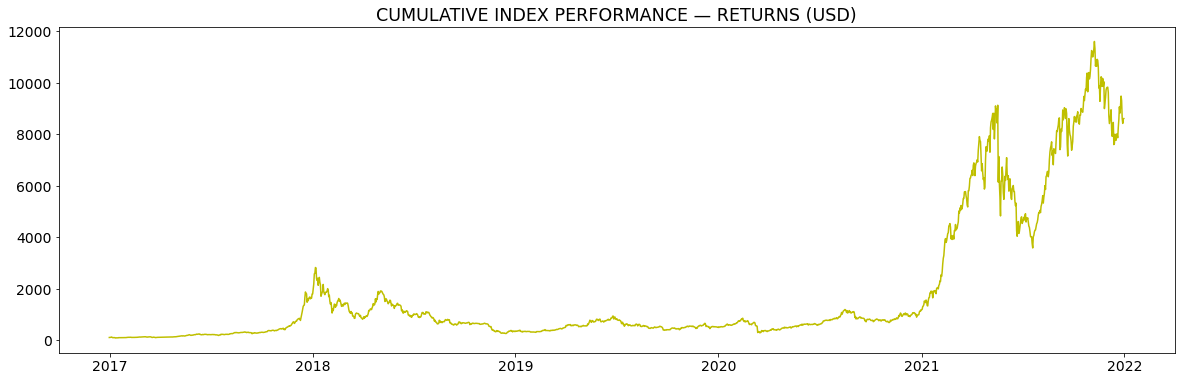

In [33]:
fig, axs = plt.subplots(figsize = (20,6)) # This is your answer to resize the figure

# The below will help you expand on your question and resize individual elements within your figure. Experiement with the below parameters.
axs.set_title("CUMULATIVE INDEX PERFORMANCE — RETURNS (USD)", fontsize = 17.5)
axs.tick_params(axis = 'x', labelsize = 14)
axs.set_xlabel('', size = 15)
axs.tick_params(axis = 'y', labelsize =14)
axs.set_ylabel('', size = 15)

plt.plot(df_final['Actual Index Value'], label = 'Index', c='y')

## The below code vvv still has to be edited

## Pulling data for our benchmark CMC200 and comparable indexes/assets

In [32]:
tier_4 = ['^CMC200', '^GSPC', '^DJI', 'BTC-USD']

#df_benchmark_temp = (reader.get_data_yahoo(tier_4, start, end)['Adj Close'] - reader.get_data_yahoo(tier_4, start, end)['Open']) / reader.get_data_yahoo(tier_4, start, end)['Open']

df_benchmark = pd.DataFrame(df_final['Actual Index Value'])
#df_benchmark = df_benchmark.join((reader.get_data_yahoo(tier_4, start, end)['Adj Close'] - reader.get_data_yahoo(tier_4, start, end)['Open']) / reader.get_data_yahoo(tier_4, start, end)['Open'], how="outer")


print(df_benchmark)

           Actual Index Value
Date                         
2016-12-31                100
2017-01-01         103.442113
2017-01-02         105.734891
2017-01-03          107.93733
2017-01-04         118.847464
...                       ...
2021-12-27        9305.794195
2021-12-28        8619.436479
2021-12-29        8420.989177
2021-12-30        8590.342378
2021-12-31        8609.700477

[1827 rows x 1 columns]


##### CMC200 starts in 2018-12-31, not 2016 like our index; in order to have a robust backtest, we will scale up its inception value (and thus all proceeding levels) to the value of our index at 2018-12-31

In [38]:
print("Index value at 2018-12-31 is: \n", df_final.loc['2018-12-31'])

Index value at 2018-12-31 is: 
 Tier1 Daily Moves            0.0
Tier2 Daily Moves      -0.061372
Tier3 Daily Moves      -0.035523
Index Daily Returns    -0.052325
Adjusted Returns        0.947675
Actual Index Value     35.562374
Name: 2018-12-31 00:00:00, dtype: object


In [39]:
### finding the index of the row where CMC200 starts
df_benchmark[df_benchmark['^CMC200'] == "Nan"].shape

(0, 4)

In [326]:
print(df_benchmark.iloc[[1815]])

IndexError: positional indexers are out-of-bounds

## Adding 1 to all values in df_benchmark for adjusted returns

In [ ]:
df_benchmark += 1

In [283]:
### fill in na values
df_benchmark['^GSPC'].fillna(0)
df_benchmark['^DJI'].fillna(0)
df_benchmark['BTC-USD'].fillna(0)

print(df_benchmark)

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [^GSPC] of type str

In [270]:
df_temp2 = pd.DataFrame(columns=['^CMC200 Value', '^GSPC Value', '^DJI Value', 'BTC-USD Value'])
df_benchmark = df_benchmark.join(df_temp2, how="outer")

In [266]:
### using value 699.137174 because that is index value at time when CMC200 started
df_benchmark['^CMC200 Value'][0] = 699.137174
df_benchmark['^GSPC Value'][0] = 100
df_benchmark['^DJI Value'][0] = 100
df_benchmark['BTC-USD Value'][0] = 100
for i in range(1, len(df_benchmark)):
    df_benchmark['^CMC200 Value'][i] = df_benchmark['^CMC200 Value'][i - 1] * (df_benchmark['^CMC200'][i])
    df_benchmark['^GSPC Value'][i] = df_benchmark['^GSPC Value'][i - 1] * (df_benchmark['^GSPC'][i])
    df_benchmark['^DJI Value'][i] = df_benchmark['^DJI Value'][i - 1] * (df_benchmark['^DJI'][i])
    df_benchmark['BTC-USD Value'][i] = df_benchmark['BTC-USD Value'][i - 1] * (df_benchmark['BTC-USD'][i])

print(df_benchmark)

<ipython-input-266-21eddd7a7c0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_benchmark['^CMC200 Value'][0] = 699.137174
<ipython-input-266-21eddd7a7c0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_benchmark['^GSPC Value'][0] = 100
<ipython-input-266-21eddd7a7c0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_benchmark['^DJI Value'][0] = 100
<ipython-input-266-21eddd7a7c0c>:5: SettingWithCopyWarning: 
A value is tr

             ^CMC200     ^GSPC      ^DJI   BTC-USD   ETH-USD  \
Date                                                           
2016-12-31  1.000000  1.000000  1.000000  1.003244  0.977666   
2017-01-01  1.000000  1.000000  1.000000  1.035974  1.023835   
2017-01-02  1.000000  1.000000  1.000000  1.023165  1.025412   
2017-01-03  1.000000  1.002780  1.000448  1.021770  1.161282   
2017-01-04  1.000000  1.004046  1.002575  1.105640  1.158849   
...              ...       ...       ...       ...       ...   
2021-12-14  1.015164  0.998083  0.998271  0.997919  0.990118   
2021-12-15  1.043542  1.015829  1.010635  1.010686  1.040426   
2021-12-16  0.993072  0.989307  0.996153  0.974744  0.985587   
2021-12-17  0.969686  0.993152  0.987858  1.000000  1.000000   
2021-12-18  1.000000  1.000000  1.000000  1.007202  1.011743   

           ^CMC200 Performance ^GSPC Performance ^DJI Performance  \
Date                                                                
2016-12-31                 Na

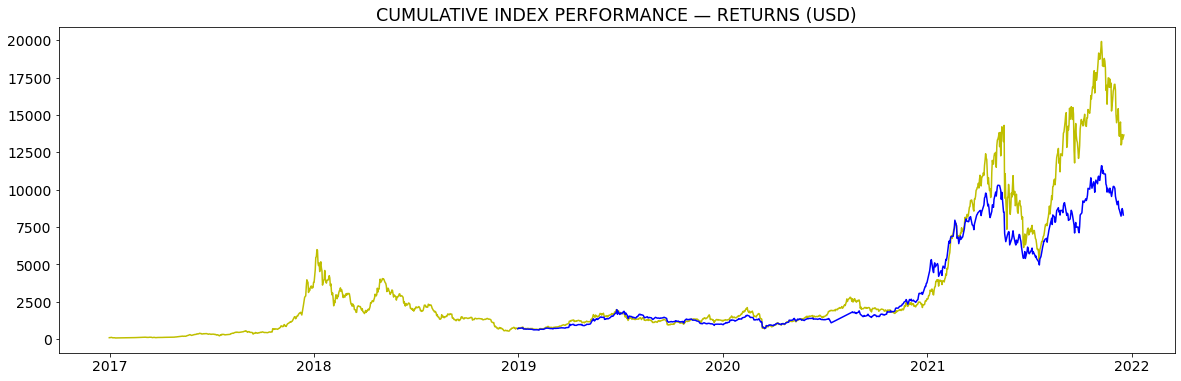

In [254]:
fig, axs = plt.subplots(figsize = (20,6)) # This is your answer to resize the figure

# The below will help you expand on your question and resize individual elements within your figure. Experiement with the below parameters.
axs.set_title("CUMULATIVE INDEX PERFORMANCE — RETURNS (USD)", fontsize = 17.5)
axs.tick_params(axis = 'x', labelsize = 14)
axs.set_xlabel('', size = 15)
axs.tick_params(axis = 'y', labelsize =14)
axs.set_ylabel('', size = 15)

plt.plot(df_final['Actual Index Value'], label = 'Index', c='y')
plt.plot(df_benchmark['Adjusted Returns'], label = 'Benchmark', c='b')


In [441]:
df_temp2 = pd.DataFrame(columns=['Returns'])
df_benchmark = df_benchmark.join(df_temp2, how="outer")

ValueError: columns overlap but no suffix specified: Index(['Returns'], dtype='object')

In [445]:
df_temp3 = pd.DataFrame(columns=['Date'])
df_final = df_final.join(df_temp3, how="outer")

In [447]:
df_final['Date'] = df_final.index


In [448]:
print(df_final)

           Tier1 Value Tier2 Value Tier3 Value   BTC-USD Index Value  \
Date                                                                   
2016-12-31         0.0         0.0    0.002139  0.003244    0.002139   
2017-01-01         0.0         0.0     0.03545  0.035974     0.03545   
2017-01-02         0.0         0.0    0.023262  0.023165    0.023262   
2017-01-03         0.0         0.0    0.027793  0.021770    0.027793   
2017-01-04         0.0         0.0    0.107937  0.105640    0.107937   
...                ...         ...         ...       ...         ...   
2021-12-01    0.006904    0.031074    0.001744  0.005656    0.016056   
2021-12-02    0.007289   -0.003947   -0.013914 -0.012925    0.000675   
2021-12-03    0.008488   -0.058782   -0.055408 -0.051512   -0.024809   
2021-12-04   -0.134293   -0.069957   -0.067373 -0.084261   -0.101867   
2021-12-05   -0.079408   -0.063308   -0.001555 -0.003931   -0.065183   

           Real Returns Actual Index Value       Date  
Date   